TP3:Integration numérique

Ghraieb wafa 2DN1

<html>
    <body>
        <h1 style="color:blue;"><center>Intégration Numérique</h1>
    </body>
</html>

### Introduction:

<html>
    <body>
        <p style="color:darkblue;">En analyse numérique, il existe une vaste famille d’algorithmes dont le but principal est d’estimer la valeur numérique de l’intégrale définie sur un domaine particulier pour une fonction donnée (par exemple l’intégrale d’une fonction d’une variable sur un intervalle).</p>
        <p style="color:darkblue;">Ces techniques procèdent en trois phases distinctes :</p>
        <p style="color:darkblue;">Décomposition du domaine en morceaux (un intervalle en sous-intervalles contigus) ;</p>
        <p style="color:darkblue;">Intégration approchée de la fonction sur chaque morceau ;</p>
        <p style="color:darkblue;">Sommation des résultats numériques ainsi obtenus.</p>
    </body>
</html>

### Méthode des rectangles:

<html>
    <body>
        <ul>
            <li style="color:darkblue;">C’est la méthode la plus simple qui consiste 
            à interpoler la fonction f à intégrer par une fonction 
            constante (polynôme de degré 0).</li>
            <li style="color:darkblue;">C’est la méthode d’ordre 0.</li>
            <li style="color:darkblue;">La convergence semble lente.</li>
            <li style="color:darkblue;"> L’erreur commise est négative dans
les intervalles où f est croissante et elle est positive quand f est décroissante.
En particulier, si la fonction f est croissante sur [a, b] ou bien décroissante sur [a, b] il n’y a pas de compensations d’erreurs entre les intervalles.</li>   
        </ul>
    </body>
</html>
             


### Méthode du point milieu:


<html>
    <body>
        <ul>
            <li style="color:darkblue;"> Le choix du point milieu améliore l’ordre de la méthode : 
        celle du rectangle est exacte (c’est-à-dire E(f) = 0) pour les fonctions constantes alors que celle du point milieu est exacte pour les polynômes de degré 1.</li>
            <li style="color:darkblue;">C’est la méthode d’ordre 1.</li>
            <li style="color:darkblue;">
La méthode du point milieu permet d’améliorer sensiblement la vitesse de convergence par rapport
aux rectangles. </li>
        </ul>
    </body>
</html>

### Méthode des trapèzes:

<html>
    <body>
        <ul>
            <li style="color:darkblue;"> En interpolant f par un polynôme de degré 1, les deux points d'interpolation (a, f (a)) et (b, f (b)) suffisent à tracer un segment dont l’intégrale correspond à l’aire d’un trapèze.</li>
            <li style="color:darkblue;">C’est la méthode d’ordre 1.</li>
            <li style="color:darkblue;">
Conformément aux expressions de l’erreur, la méthode des trapèzes est souvent moins performante que celle du point milieu. </li>
        </ul>
    </body>
</html>

### Méthode de Simpson:

<html>
    <body>
        <ul>
            <li style="color:darkblue;"> En interpolant f par un polynôme de degré 2 (3 degrés de liberté), 3 points (ou conditions) sont nécessaires pour le caractériser : les valeurs aux extrémités a, b, et celle choisie en leur milieu m = (a + b) / 2. La méthode de Simpson est basée sur un polynôme de degré 2 (intégrale d’une parabole), tout en restant exacte pour des polynômes de degré 3.</li>
            <li style="color:darkblue;">C’est la méthode d’ordre 3.</li>
            <li style="color:darkblue;">Comme la méthode du point milieu qui caractérise un polynôme de degré 0 et qui reste exacte pour tout polynôme de degré 1, la méthode de Simpson caractérise un polynôme de degré 2 et reste exacte pour tout polynôme de degré 3. Il s’agit d’une sorte d’anomalie où se produisent des compensations bénéfiques à l’ordre de la méthode.</li>
        </ul>
    </body>
</html>

Dans ce TP, on va créer quatre classes. Pour chaque classe on va préciser les bornes de l'intervalle 
a et b, le nombre de points, la fonction f et on va créer les fonctions suivantes: integrate: Pour 
calculer l'intégrale avec la méthode précisé et plot pour afficher la fonction, la valeur approché de 
l'intégralle.

In [1]:
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual, widgets

In [2]:
class RectangleG ( object ) :
# Innitialisation de la classe (méthode de rectangles) en donnant comme paramètres la fonction f, les bornes del'intervalle a et b ainsi que le nombre de points
    def __init__ (self , a , b , n , f ) :    
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )   # Pour avoir n subdivisions, il faut n+1 points.
        self.f = f
        self.n = n
# La fonction integrate est utilisé pour calculer l'intégrale.
    def integrate ( self , f ) :
        x= self.x
        y= f( x )
        h = float( x[1] - x[0] )
        s = sum( y[ 0 : -1 ] )
        return h * s
    def Graph ( self , f , resolution =1001 ) :
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace( self.a , self.b , resolution )
        for i in range ( self.n ) :
            x_rect = [xl[ i ] , xl[ i ] , xl[ i + 1 ] , xl[i+1] , xl[ i ] ] # abscisses des sommets
            y_rect = [0 , yl[ i ] , yl[ i ] , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , 'r' )
        yflist_fine = f ( xlist_fine )
        plt.plot ( xlist_fine , yflist_fine )
        plt.plot(xl, yl,"bo")
        plt.xlabel ( 'x' )
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des rectangles gauches' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

    

In [3]:
class RectangleM(object):
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a , b , n+1 )
        self.f = f
        self.n = n
    def integrate(self,f):
        x= self.x
        h = float(x[1] - x[0] )
        s = 0
        for i in range(self.n):
            s=s+f((x[i]+x[i+1])*0.5)
        return h*s 
    def Graph (self,f,resolution =1001):
        xl = self.x
        yl = f(xl);
        xlist_fine =np.linspace( self.a, self.b, resolution)
        for i in range(self.n):
            m=(xl[i]+xl[i+1])/2
            x_rect = [xl[i] , xl[i] , xl[i+1] , xl[i+1] , xl[i]] # abscisses des sommets
            y_rect = [0 , f(m) , f(m) , 0 , 0 ] # ordonnees des sommets
            plt.plot ( x_rect , y_rect , "r" )
            plt.plot(m,f(m),"g*")
        yflist_fine = f(xlist_fine)
        plt.plot (xlist_fine , yflist_fine ,'b')
        plt.plot(xl, yl,"bo")
        plt.xlabel ('x')
        plt.ylabel ('f(x)')
        plt.title ( 'Methode de point Milieu' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )


In [4]:
class Trapezoidal(object):
    def __init__(self, a, b, n, f):
        self.a = a
        self.b = b
        self.x = np.linspace(a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        s = y[0] + y[-1] + 2.0*sum(y[1:-1])
        return h * s / 2.0
    def Graph(self,f,resolution=1001):
        xl = self.x
        yl = f(xl)
        xlist_fine=np.linspace(self.a, self.b, resolution)
        for i in range(self.n):
            x_rect = [xl[i], xl[i], xl[i+1], xl[i+1], xl[i]] # abscisses des sommets
            y_rect = [0   , yl[i], yl[i+1]  , 0     , 0   ] # ordonnees des sommets
            plt.plot(x_rect, y_rect,'r')
        yflist_fine = f(xlist_fine)
        plt.plot(xlist_fine, yflist_fine)#plot de f(x)
        plt.plot(xl, yl,"bo")#point support
        plt.ylabel ( ' f ( x ) ' )
        plt.title ( ' Methode des Trapèzes' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

In [5]:
class Simpson (object):
    def __init__ (self , a , b , n , f ) :
        self.a = a
        self.b = b
        self.x = np.linspace( a, b, n+1)
        self.f = f
        self.n = n
    def integrate(self,f):
        x=self.x
        y=f(x)
        h = float(x[1] - x[0])
        n=len(x)-1
        if n % 2 == 1:
            n -= 1
        s = y[0] + y[n] + 4.0* sum(y[1:-1:2]) + 2.0 * sum(y[2:-2:2])
        return h * s / 3.0
    def Graph(self,f,resolution =1001):
        xl = self.x
        yl = f(xl)
        xlist_fine =np.linspace(self.a , self.b , resolution)
        for i in range (self.n):
            xx=np.linspace(xl[i], xl[i+1], resolution)
            m=(xl[i]+xl[i+1])/2
            aa=xl[i]
            bb=xl[i+1]
            l0=(xx-m)/(aa-m)*(xx-bb)/(aa-bb)
            l1=(xx-aa)/(m-aa)*(xx-bb)/(m-bb)
            l2=(xx-aa)/(bb-aa)*(xx-m)/(bb-m)
            p=f(aa)*l0 + f(m)*l1 + f(bb)*l2
            plt.plot(xx,p,'b')
            plt.plot(m,f(m),'b')
        yflist_fine = f( xlist_fine )
        plt.plot (xlist_fine , yflist_fine ,'r')
        plt.plot(xl, yl,"bo")
        plt.ylabel ('f(x)')
        plt.title ( 'Methode de Simpson' )
        plt.text( 0.5*( self.a+ self.b ) , f(self.b ) , 'I_{} ={:0.8f}'.format(self.n,self.integrate( f ) ) , fontsize =15 )

                             

In [6]:
def sim(n,f):
    RG=RectangleG(-1,1,n,f)
    RM=RectangleM(-1,1,n,f)
    T=Trapezoidal(-1,1,n,f)
    S=Simpson(-1,1,n,f)
    fig= plt.figure(figsize=(24,8))
    plt.subplot(221)
    RG.Graph(f)
    plt.subplot(222)    
    RM.Graph(f)
    plt.subplot(223)    
    T.Graph(f)
    plt.subplot(224)    
    S.Graph(f)
    plt.show()

In [7]:
interact(sim,n=widgets.IntSlider(min=1, max=50, step=3, value=10),f={'1/(1+x**2)':lambda x:1/(1+x**2),'sin(x)':lambda x: sin(x),'cos(x)':lambda x:cos(x),'x**2-x+5':lambda x:x**2-x+5});

interactive(children=(IntSlider(value=10, description='n', max=50, min=1, step=3), Dropdown(description='f', o…

In [8]:
Method=widgets.Dropdown(
    options=[('Méthode des rectangles gauches',1), ('Méthode du point milieu',2), ('Méthode des trapèzes',3), ('Méthode de Simpson',4)],
    description='Méthode:',
    
)
text_func=widgets.Text(value='', description='Fonction', continuous_update=False)
text_a=widgets.Text(value='', description='a', continuous_update=False)
text_b=widgets.Text(value='', description='b', continuous_update=False)
n=widgets.IntSlider(min=1, max=100, step=3, value=10)
button=widgets.Button(description="Calculer")
def sim(b):
    dic={1:RectangleG,2:RectangleM,3:Trapezoidal,4:Simpson}
    s=Method.value
    plt.cla()
    func=lambda x:eval(text_func.value)
    R=dic[s](float(text_a.value), float(text_b.value),n.value,func)
    R.Graph(func)
def update_a(change):
    change.new 
def update_b(change):
    change.new 
def update_f(change):
    change.new 
button.on_click(sim)
text_func.observe(update_f,'value')
text_a.observe(update_a,'value')
text_b.observe(update_b,'value')
output= widgets.Output()
def make_boxes():
    vbox1 = widgets.VBox([Method, text_func,text_a,text_b,n,button])
    vbox2 = widgets.VBox([ output])
    return vbox1, vbox2
box_layout = widgets.Layout(
        border='solid 2px gray' ,
        margin='0px 10px 10px 0px',
        padding='5px 5px 5px 5px')
vbox1, vbox2 = make_boxes()
vbox1.Layout = box_layout
vbox2.Layout = box_layout
widgets.HBox([vbox1, vbox2])

    


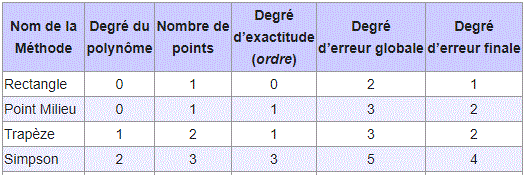